# Dask Bag

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы: 
* Макрушин С.В. Лекция "Map-Reduce"
* https://docs.dask.org/en/latest/bag.html
* Jesse C. Daniel. Data Science with Python and Dask. 

## Задачи для совместного разбора

1. Посчитайте длину (в кол-ве символов) каждого заголовка.

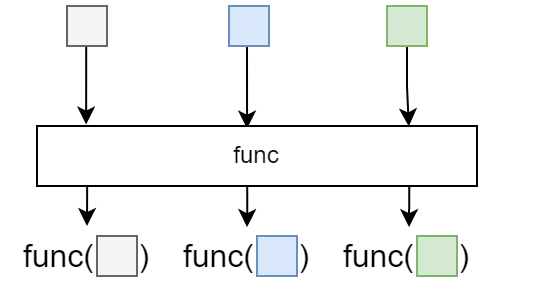

2. Выведите id постов, длина заголовков которых не более 15 символов.

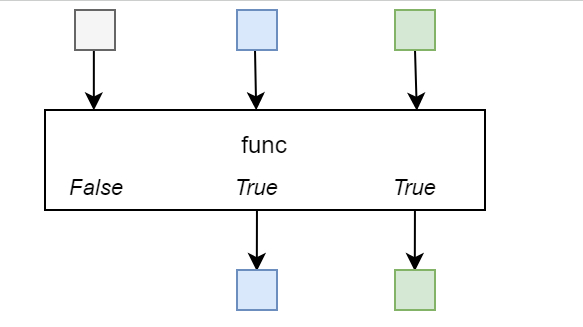

3. Посчитайте суммарную длину длин описаний постов

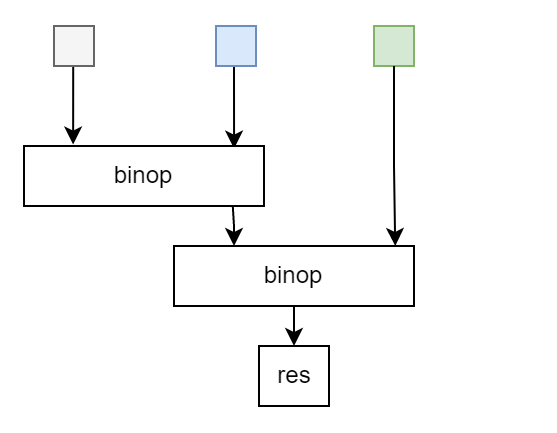

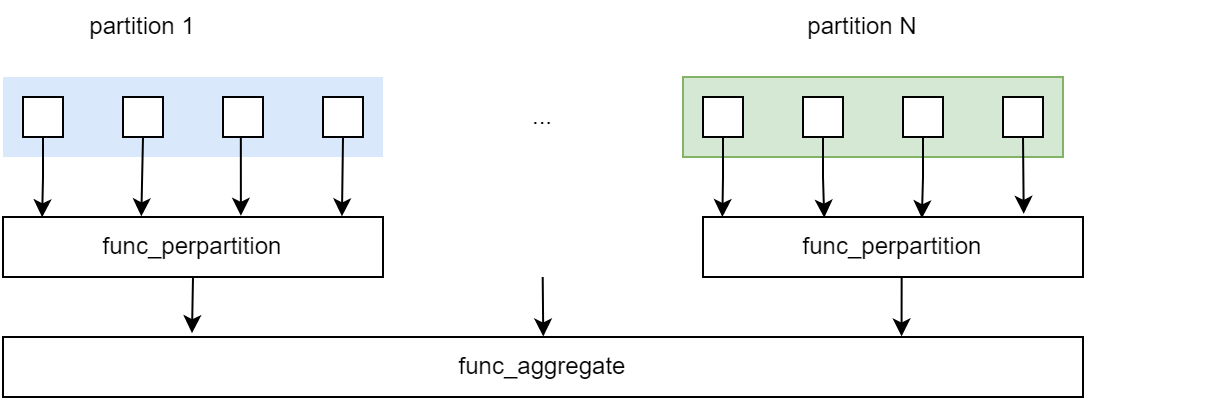

4. При помощи метода `foldby` посчитайте, сколько постов написал каждый из пользователей.

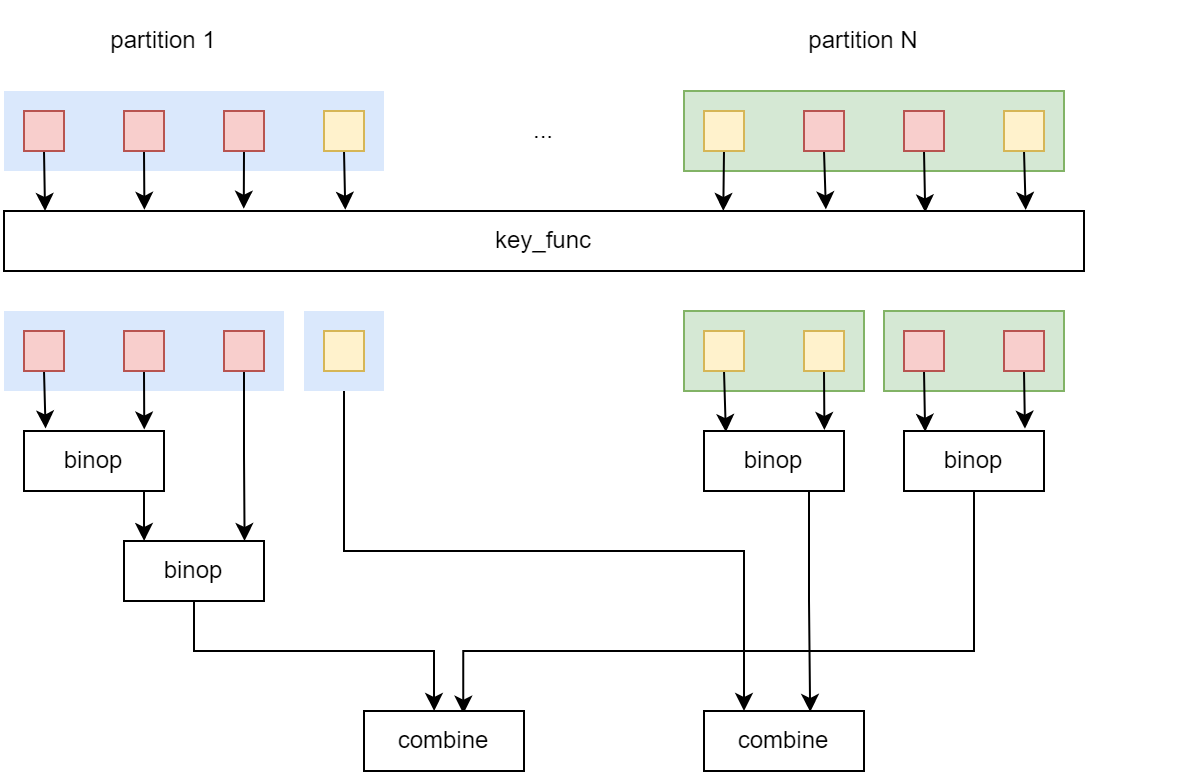

## Лабораторная работа 12

__При решении данных задач не подразумевается использования циклов или генераторов Python в ходе работы с пакетами `numpy`, `pandas` и `dask`, если в задании не сказано обратного. Решения задач, в которых для обработки массивов `numpy`, структур `pandas` или структур `dask` используются явные циклы (без согласования с преподавателем), могут быть признаны некорректными и не засчитаны.__

В ходе выполнения все операции вычислений проводятся над `dask.bag` и средствами пакета `dask`, если в задании не сказано обратного. Переход от `dask.bag` к `pd.DataFrame` возможен исключительно для демонстрации результата в конце решения задачи. Если в задаче используются результаты выполнения предыдущих задач, то подразумевается, что вы используете результаты в виде `dask.bag` (то есть то, что было получено до вызова `compute`, а не после).

1\. В файлах архива `reviews_full.zip` находятся файлы, содержащие информацию об отзывах к рецептам в формате JSON Lines. Отзывы разделены на файлы в зависимости от оценки (например, в файле `reviews_1.json` находятся отзывы с оценкой 1). Считайте файлы из этого архива (предварительно разархивировав) в виде `dask.bag`. Преобразуйте текстовое содержимое файлов с помощью модуля `json`. Выведите на экран первые 5 элементов полученного `bag`.

In [1]:
import dask.bag as db
import json
from functools import reduce
import re
import pandas as pd

In [2]:
review_files_0 = db.read_text('reviews_*.json').map(json.loads)

In [3]:
review_files_0.take(5)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.'},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten'},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will be making this often.'},
 {'u

2\. Модифицируйте функцию разбора JSON таким образом, чтобы в каждый словарь c информацией об отзыве добавить ключ `rating`. Значение получите на основе названия файла (см. аргумент `include_path` функции `read_text`), использовав для этого регулярное выражение. При создании `bag` разбейте набор данных на сегменты размером 128 Мб (см. аргумент `blocksize`).  Выведите на экран первые 5 элементов полученного `bag`.

In [4]:
def add_rating(data):
    json_str, path = data
    file_number = re.findall('reviews_([0-5]).json', path)
    json_obj = json.loads(json_str)
    json_obj["rating"] = int(file_number[0])
    return json_obj

In [5]:
review_files = db.read_text('reviews_*.json', include_path=True, blocksize='128MiB').map(add_rating)
review_files.take(5)

({'user_id': 452355,
  'recipe_id': 292657,
  'date': '2016-05-08',
  'review': 'WOW!!! This is the best. I have never been able to make homemade enchiladas that taste like the Mexican restaurants. I made this last night for my family and they said they will never have enchiladas at the Mexican Restaurants again. Thanks for sharing.',
  'rating': 0},
 {'user_id': 329304,
  'recipe_id': 433404,
  'date': '2006-06-14',
  'review': 'This was good but the dressing needed something and I found it to be a little too sweet, next time I will experiment with some garlic and herbs and reduce the sugar slightly, thanks for sharing kcdlong!...Kitten',
  'rating': 0},
 {'user_id': 227932,
  'recipe_id': 2008187,
  'date': '1985-11-19',
  'review': 'Very good,it was a hit for my family. I used 6 cloves of garlic and had 1 lb beef and  Johnsonville sausage,1/2 lb hot and  1/2 lb honey garlic( which I wanted to use). That was a perfect combo for us. The sausage gave it nice flavor No guestion , I will

3\. Посчитайте, сколько различных пользователей оставляли отзывы. Выведите это количество на экран.

In [6]:
ids = review_files.map(lambda r: r["user_id"])
ids.distinct().count().compute()

226570

4\. Создайте версию `bag` из задания 2, в которой сохранены только отзывы, оставленные в 2014 и 2015 годах. Посчитайте и выведите на экран долю, которую составляют отзывы, оставленные в 2014 и 2015 году, среди всех отзывов.

In [7]:
reviews_1415 = review_files.filter(lambda r: (r['date'][:4] == '2014') or (r['date'][:4] == '2015'))
reviews_1415.compute()

[{'user_id': 229850,
  'recipe_id': 1300038,
  'date': '2014-10-03',
  'review': 'Took this to a New Year&#039;s Eve Party. Everyone loved it! It&#039;s absolutely perfect, the flavor, the crunch, just delicious!',
  'rating': 0},
 {'user_id': 2706705,
  'recipe_id': 133747,
  'date': '2015-05-08',
  'review': 'Simple and easy way to enjoy a slice of pizza any time!  Well-toasted bread is the key - really toast it!  I put a bit of pizza sauce underneath my cheese for a more pizza-like flavor.  I used sourdough bread & medium cheddar cheese.  Fast & fun!  Great idea!  Made for 1-2-3 Hits Tag Game.',
  'rating': 0},
 {'user_id': 945545,
  'recipe_id': 898468,
  'date': '2015-06-30',
  'review': 'Delish!  I wanted to make this spicy so I used hot enchilada sauce and jalapeno refried beans.  I forgot to buy the onions so I doctored up the beans with onion powder and granulated garlic.  Added the olives under the cheese and baked, uncovered, for the 25 minutes.  Served with pico de gallo, s

In [8]:
reviews_1415.count().compute()/review_files.count().compute()

0.08117811237929945

5\. Для отзывов, оставленных в мае 2013 года, выполните предобработку: 
   * приведите строки к нижнему регистру;
   * обрежьте пробельные символы в начале и конце строки;
   * удалите все символы, кроме английских букв и пробелов.
   
Посчитайте и выведите на экран среднюю длину этих отзывов после предобработки. Если текстовое содержимое отзыва отсутствует, считайте, что длина отзыва равна нулю.

In [9]:
reviews_1305 = review_files.filter(lambda r: (r['date'][:7] == '2013-05'))

In [10]:
reviews_1305.map(lambda r: re.sub("[^a-zA-Z ]", '', r['review'].lower().strip(' '))).map(len).mean().compute()

268.9927041815848

6\. Посчитайте, как часто встречается та или иная оценка:

   * в 2014 году;
   * в 2015 году.

Создайте `pd.DataFrame`, содержащий 2 столбца: `2014`, `2015` и 6 строк, имеющие индексы строк от 0 до 5. Дайте индексам строк имя `rating`. Выведите полученную таблицу на экран.

In [11]:
reviews_14 = reviews_1415.filter(lambda r: (r['date'][:4] == '2014'))
reviews_15 = reviews_1415.filter(lambda r: (r['date'][:4] == '2015'))

In [15]:
reviews_14.compute()

[{'user_id': 229850,
  'recipe_id': 1300038,
  'date': '2014-10-03',
  'review': 'Took this to a New Year&#039;s Eve Party. Everyone loved it! It&#039;s absolutely perfect, the flavor, the crunch, just delicious!',
  'rating': 0},
 {'user_id': 86318,
  'recipe_id': 220950,
  'date': '2014-03-06',
  'review': 'I don&#039;t know whether my harissa is extremely weak or not, but the 1/2 teaspoon didn&#039;t seem to flavor anything (of course, the sensitivity of the person eating also needs to be considered - I prefer to eat hot, spicy food). I added more harissa, to get about a tablespoon, total. That was all I had, but I was still not so happy with it. And then, instead of lemon juice and parsley, I decided that chopped coriander was what this recipe needed. It was okay. As you can see, I changed the recipe all around, so do not feel comfortable assigning stars. I do think I&#039;ll seek out recipes with more promise of fire. Thank you for the experience.',
  'rating': 0},
 {'user_id': 46

In [16]:
reviews_14.pluck('rating').compute()

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [17]:
reviews_14.pluck('rating').frequencies().compute()

[(0, 21136), (1, 4344), (2, 4507), (3, 12865), (4, 58433), (5, 258832)]

In [15]:
df14 = reviews_14.pluck('rating').frequencies()
df15 = reviews_15.pluck('rating').frequencies()

In [13]:
reviews_14.pluck('rating')

({'user_id': 229850,
  'recipe_id': 1300038,
  'date': '2014-10-03',
  'review': 'Took this to a New Year&#039;s Eve Party. Everyone loved it! It&#039;s absolutely perfect, the flavor, the crunch, just delicious!',
  'rating': 0},
 {'user_id': 86318,
  'recipe_id': 220950,
  'date': '2014-03-06',
  'review': 'I don&#039;t know whether my harissa is extremely weak or not, but the 1/2 teaspoon didn&#039;t seem to flavor anything (of course, the sensitivity of the person eating also needs to be considered - I prefer to eat hot, spicy food). I added more harissa, to get about a tablespoon, total. That was all I had, but I was still not so happy with it. And then, instead of lemon juice and parsley, I decided that chopped coriander was what this recipe needed. It was okay. As you can see, I changed the recipe all around, so do not feel comfortable assigning stars. I do think I&#039;ll seek out recipes with more promise of fire. Thank you for the experience.',
  'rating': 0},
 {'user_id': 46

In [32]:
df14.compute()

[(0, 21136), (1, 4344), (2, 4507), (3, 12865), (4, 58433), (5, 258832)]

In [16]:
df1 = df14.to_dataframe(columns=['rating', '2014']).compute()
#лучше два компута сразу (вместе с 15)

In [17]:
df1 = df1.set_index('rating')

In [18]:
df2 = df15.to_dataframe(columns=['rating', '2015']).compute().set_index('rating')

In [19]:
df = pd.concat([df1, df2], axis=1)
df

,2014,2015
rating,,
0,21136,21336
1,4344,4902
2,4507,4873
3,12865,13667
4,58433,60980
5,258832,269399


7\.  Перераспределите данные из исходного `bag` на $k, k=2, 16, 32, 64, 128$ частей. Для каждого разбиения измерьте время выполнения расчета среднего рейтинга. Визуализируйте зависимость времени выполнения функции от числа сегментов. Временем, затрачиваемым на вызов метода `repartition`, можно пренебречь. Для итерации по $k$ допускается использовать циклы.

In [20]:
review_files.map(lambda r: r['rating']).mean()

In [21]:
review_list = []
for i in ([1,4,5,6,7]):
    review_list.append(review_files.repartition(npartitions=2**i))

In [22]:
%%timeit -n1 -r1 -o
print(review_list[0].pluck('rating').mean().compute())

OSError: [WinError 1450] Недостаточно системных ресурсов для завершения операции

In [27]:
time0 = _.best

In [29]:
%%timeit -n1 -r1 -o
print(review_list[1].pluck('rating').mean().compute())

OSError: [WinError 1450] Недостаточно системных ресурсов для завершения операции

In [ ]:
time1 = _.best

In [ ]:
%%timeit -n1 -r1 -o
print(review_list[2].pluck('rating').mean().compute())

In [ ]:
time2 = _.best

In [ ]:
%%timeit -n1 -r1 -o
print(review_list[3].pluck('rating').mean().compute())

In [ ]:
time3 = _.best

In [ ]:
%%timeit -n1 -r1 -o
print(review_list[4].pluck('rating').mean().compute())

In [ ]:
time4 = _.best

In [ ]:
import matplotlib.pyplot as plt

x = [2, 16, 32, 64, 128]
y = [time0, time1, time2, time3, time4]
fig, ax = plt.subplots(1,1)
ax.plot(x, y)

8\. Будем считать, что сегмент _плохо перемешан_, если в нем _подряд_ идет 5 или более отзывов, оставленных в один и тот же год. Воспользовавшись методом `map_partitions`, посчитайте и выведите на экран, сколько сегментов оказались _плохо перемешанными_ в `bag` из задачи 2. Также выведите на экран общее количество сегментов в `bag`, для которого производились расчеты.

In [34]:
def is_bad(chunk):
    bad_c = 0
    prev = ''
    for item in chunk:
        if item['date'][:4] == prev:
            bad_c += 1
            if bad_c == 4:
                return [True]
        else:
            bad_c = 0
        prev = item['date'][:4]
    return [False]
        

review_files.map_partitions(is_bad).sum().compute()

17

In [35]:
review_files.npartitions

28

9\. Будем считать, что сегмент _плохо перемешан_, если в нем подряд идет 5 или более отзывов, оставленных в один и тот же год. Воспользовавшись методом `reduction`, посчитайте и выведите на экран, сколько сегментов оказались _плохо перемешанными_ в `bag` из задачи 1. При реализации функций для свертки воспользуйтесь `functools.reduce`. 

In [43]:
from functools import reduce

def is_bad_reduction(chunk):
    bad_c = 0
    prev = ''
    for item in chunk:
        if item['date'][:4] == prev:
            bad_c += 1
            if bad_c == 4:
                return True
        else:
            bad_c = 0
        prev = item['date'][:4]
    return False

review_files_0.reduction(is_bad_reduction, lambda x: reduce(lambda x, y: x + y, x)).compute()

3

10\. Используя метод `foldby`, подсчитайте и выведите на экран максимальную длину отзывов в зависимости от оценки `rating` в наборе, полученном в задании 2.

In [42]:
def binop(total, x):
    if x['review']:
        return max(total, len(x['review']))
    return total

def combine(total1, total2):
    return max(total1, total2)

review_files.foldby('rating', binop, 0, combine, 0).compute()

[(0, 6972), (1, 5567), (2, 6972), (3, 4954), (4, 8587), (5, 8587)]